In [162]:
import numpy as np
import pandas as pd
import re
from matplotlib import pyplot as plt
plt.style.use('ggplot')

### Additionaly datasets with information of plants and over the counter drug spend 

In [20]:
otc_sales = pd.read_csv('otc_sales_category.csv')

In [21]:
otc_sales.sample(10)

,OTC Category,2015,2016,2017,2018
18,Heartburn,3160.0,3177.0,3197.0,3229.0
15,Foot Care,358.0,355.0,353.0,356.0
8,Eczema & Psoriasis,182.0,199.0,206.0,225.0
2,"Analgesics, External",625.0,694.0,796.0,861.0
20,Jock Itch,53.0,56.0,57.0,57.0
12,Feminine Itch & Yeast Treatment,257.0,248.0,249.0,253.0
5,Antiperspirants,2762.0,2852.0,2911.0,3034.0
32,NaN,NaN,NaN,NaN,NaN
14,First Aid,1213.0,1236.0,1251.0,1269.0
23,Lip/Oral Treatment,1098.0,1108.0,1127.0,1189.0


In [22]:
species = pd.read_csv('species.csv')

/Users/itadmin/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [23]:
species.columns

Index(['Species ID', 'Park Name', 'Category', 'Order', 'Family',
       'Scientific Name', 'Common Names', 'Record Status', 'Occurrence',
       'Nativeness', 'Abundance', 'Seasonality', 'Conservation Status',
       'Unnamed: 13'],
      dtype='object')

In [24]:
species['Scientific Name'] = species['Scientific Name'].apply(lambda s: s.lower())
species['Common Names'] = species['Common Names'].apply(lambda s: s.lower())

## Scapped dataset from https://www.anniesremedy.com/ 

In [210]:
# Read in csv
df = pd.read_csv('../web_scraping/Introduction_to_Scrapy/herb/herbs2.csv')

# clean up common name
# df['common_name'] = df['common_name'].str.split('\t')
# for i in range(df['common_name'].shape[0]):
#     df['common_name'][i] = df['common_name'][i][1]
    
# 
df.common_name[175] = "Medicinal Uses & Benefits of \tCinnamon  "
#df = df.drop('botanical_name', axis = 1)

In [211]:
# Missing name How to use empty
#df[df.link.str.contains('glechoma')].T
df.shape
# 365 herbs

(365, 8)

In [212]:
# Clean common_names to remove "How to use:"
common_name_lst = df.common_name.str.split('\t').to_list()
df.common_name = [x[1] for x in common_name_lst]

In [199]:
df.shape 

(365, 8)

In [213]:
# Clean Link col to make 
link_lst = df.link.str.split('<200 https://www.anniesremedy.com/').to_list()

link_lst2 = [x[1].split('.php>') for x in link_lst]
df.link = [x[0] for x in link_lst2]
for i in range(len(df.link)):
    df.link[i] = df.link[i].replace('-', ' ')

In [201]:
#df[~df.common_name.str.contains('\t')]

In [214]:
df.medicinal_uses = df.medicinal_uses.str.replace('*', '')
df.properties = df.properties.str.replace('*', '')
df.tags = df.tags.str.replace('*', '')
df.folklore = df.folklore.str.replace('Regional Traditions', '')
df.description = df.description.str.replace('Regional Traditions', '')


In [215]:
# make a capy to protect original dataframe 
df_text = df.copy()

df_text.folklore = df_text.folklore.str.replace('\n', '')
df_text.folklore = df_text.folklore.str.replace('\t', '')

df_text.description = df_text.description.str.replace('\n', '')
df_text.description = df_text.description.str.replace('\t', '')
df_text.description = df_text.description.str.replace('\r', '')

df_text.origins = df.origins.str.replace('\n', '')
df_text.origins = df.origins.str.replace('\t', '')

In [216]:
#df_text_folklore = df_text[df_text.folklore != '']

In [220]:
df_text.sample(10)

,common_name,description,folklore,link,medicinal_uses,origins,properties,tags
239,Birch,Birch is a natural pain reliever containing s...,,betula alba birch bark leaf,"Cancer Prevention, Eczema, Kidney, Pain Relief",NaN,"Analgesic, Anti-inflammatory, Aromatic, Astri...","Cancer Prevention, Eczema, Kidney, Pain Relie..."
142,Eleuthero,", also known as eleuthero ginseng or Siberian ...",Siberian ginseng was used in Eastern Europe as...,eleutherococcus senticosus eleuthero root,"Chinese, Diet/weight Loss, Fatigue, Fibromyal...","\n,\n, \n ,Traditional Chinese Medicine,Chines...","Adaptogens, Appetite Depressant, Breath, Circ...","Chinese, Diet/weight Loss, Fatigue, Fibromyal..."
62,Maple,NaN,,acer saccharinum maple,Spring Tonics,NaN,NaN,Spring Tonics
324,Valerian,Valerian is without doubt the most widely reco...,The word Valerian occurs in the recipes of th...,valeriana officinalis root,"Addiction, Cardiovascular, Cough, Cramps/abdo...",European,"Adaptogens, Anodyne, Antispasmodic, Anxiety, ...","Addiction, Cardiovascular, Cough, Cramps/abdo..."
319,Canadian Wild Ginger,":, * ,Roots can be harvested any time of year...",,asarum canadense wild ginger,NaN,North America,"Bitter, Carminative, Diaphoretic, Diuretic, E...",NaN
218,Pineapple,,,ananas comosus pineapple,"Digestion, IBS, Lupus",NaN,Anti-inflammatory,"Digestion, IBS, Lupus"
80,Kava-Kava,NaN,"In this shrubs native habitat, Polynesia and t...",piper methysticum kava kava,"Anxiety, Aphrodisiac, Dental/Oral Care, Dysme...","\n,\n, \n ,Tropical islands","Analgesic, Anodyne, Antibacterial, Anxiety, C...","Anxiety, Aphrodisiac, Dental/Oral Care, Dysme..."
207,Cajeput,"The key use of cajeput is to relieve stiff, ac...",Cajeput was introduced to Europe from Indonesi...,melaleuca leucadendron cajeput oil,"Aromatherapy, Arthritis, Bronchitis, Colds, C...","Australia,Southeast Asia,Tea Tree ,","Analgesic, Antibacterial, Astringent, Calm, D...","Aromatherapy, Arthritis, Bronchitis, Colds, C..."
138,Epimedium,", ,Epimedium, also known as Yin Yang Huo or H...",,epimedium grandiflorum,"Aphrodisiac, Asthma, Bronchitis, Cardiovascul...",Traditional Chinese Medicine,"Aphrodisiac, Diuretic, Hypertensive, Tonic","Aphrodisiac, Asthma, Bronchitis, Cardiovascul..."
147,Devils Claw,Devils claw tubers contain a group of chemical...,This shrub-like perennial vine has a long hist...,harpagophytum procumbens devil claw,"African, Cardiovascular, Fibromyalgia, Gout, ...",African,"Analgesic, Anodyne, Anti-inflammatory, Bitter...","African, Cardiovascular, Fibromyalgia, Gout, ..."


In [33]:
#df_text_folklore.folklore.isna().sum()

In [34]:

df.merge(species, how = 'inner', left_on='common_name', right_on='Common Names')
# df.merge(species, how = 'inner', left_on='link', right_on='Scientific Name')

,common_name,description,folklore,link,medicinal_uses,properties,Species ID,Park Name,Category,Order,Family,Scientific Name,Common Names,Record Status,Occurrence,Nativeness,Abundance,Seasonality,Conservation Status,Unnamed: 13


### Working on medicinal uses
- What are all the medicinal uses?
- How to take out the geographic references
- combine into a list and take set 
- choose a handful and explore

In [35]:
df_medicinal = df[['common_name', 'link', 'medicinal_uses']]
df_medicinal = df_medicinal.dropna(axis = 0)

In [36]:
lst_med = df_medicinal.medicinal_uses.to_list()
#[el for lst in nested_list for el in lst]
lst_med = [el for lst in lst_med for el in lst]

In [37]:
len(set([el for lst in lst_med for el in lst]))

51

In [38]:
lst_med

[' Arthritis',
 ' Cholesterol',
 ' Culinary/Kitchen',
 ' Massage Oils',
 ' North American',
 ' Nutrition',
 ' Skin Care',
 ' Constipation',
 ' Parasites/worms',
 ' Aromatherapy',
 ' Cellulite',
 ' Cuts & Wounds',
 ' Deodorants/Perfumes',
 ' Detoxification',
 ' Facial Care',
 ' Flu',
 ' Varicose Veins',
 ' Amenorrhea',
 ' Aphrodisiac',
 ' Bruises/sprains',
 ' Cancer Prevention',
 ' Chinese',
 ' Dysmenorrhea',
 ' Female Hormones',
 ' Immune',
 ' Liver',
 ' Longevity Tonics',
 ' Menopause',
 ' Menorrhagia',
 ' Nerve/Back Pain',
 ' PMS',
 ' Allergies',
 ' Congestion',
 ' Eyes/Vision',
 ' Sinus',
 ' Acne ',
 ' Eczema',
 ' Liver',
 ' Cardiovascular',
 ' Chinese',
 ' Cholesterol',
 ' Hypertension',
 ' Immune',
 ' Longevity Tonics',
 ' Stress',
 ' Aromatherapy',
 ' Bronchitis',
 ' Bruises/sprains',
 ' Burns',
 ' Cardiovascular',
 ' Congestion',
 ' Congestion',
 ' Dental/Oral Care',
 ' Facial Care',
 ' Flu',
 ' Herpes/Cold Sores',
 ' Hypertension',
 ' IBS',
 ' Insect Repellent',
 ' Diabetes',
 

In [39]:
unique_medicinal_uses = set([el for lst in lst_med for el in lst])

In [40]:
def count_frequency(lst): 
    freq = {} 
    for item in lst: 
        if (item in freq): 
            freq[item] += 1
        else: 
            freq[item] = 1
    return freq

In [41]:
med_freq = count_frequency(lst_med)

In [42]:
#med_freq = sorted(med_freq.items(), key=lambda kv: kv[1])

In [43]:
med_freq

{' Arthritis': 20,
 ' Cholesterol': 19,
 ' Culinary/Kitchen': 66,
 ' Massage Oils': 11,
 ' North American': 2,
 ' Nutrition': 33,
 ' Skin Care': 29,
 ' Constipation': 12,
 ' Parasites/worms': 20,
 ' Aromatherapy': 57,
 ' Cellulite': 16,
 ' Cuts & Wounds': 43,
 ' Deodorants/Perfumes': 7,
 ' Detoxification': 7,
 ' Facial Care': 29,
 ' Flu': 17,
 ' Varicose Veins': 9,
 ' Amenorrhea': 15,
 ' Aphrodisiac': 20,
 ' Bruises/sprains': 15,
 ' Cancer Prevention': 25,
 ' Chinese': 36,
 ' Dysmenorrhea': 16,
 ' Female Hormones': 16,
 ' Immune': 23,
 ' Liver': 23,
 ' Longevity Tonics': 37,
 ' Menopause': 14,
 ' Menorrhagia': 12,
 ' Nerve/Back Pain': 21,
 ' PMS': 9,
 ' Allergies': 10,
 ' Congestion': 35,
 ' Eyes/Vision': 16,
 ' Sinus': 9,
 ' Acne ': 13,
 ' Eczema': 27,
 ' Cardiovascular': 40,
 ' Hypertension': 30,
 ' Stress': 13,
 ' Bronchitis': 38,
 ' Burns': 24,
 ' Dental/Oral Care': 20,
 ' Herpes/Cold Sores': 11,
 ' IBS': 30,
 ' Insect Repellent': 29,
 ' Diabetes': 19,
 ' Bladder Infection (UTI)': 

In [44]:
data_hist = pd.DataFrame.from_dict(med_freq, orient = 'index', columns= ["frequency"])

(array([19., 24., 32.,  9., 11.,  5.,  5.,  0.,  1.,  1.]),
 array([ 1. ,  7.5, 14. , 20.5, 27. , 33.5, 40. , 46.5, 53. , 59.5, 66. ]),
 <a list of 10 Patch objects>)

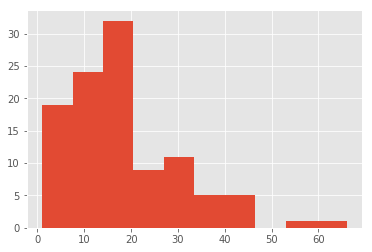

In [45]:
plt.hist(data_hist['frequency'])

([array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0.]),
  array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0.]),
  array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]),
  array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]),
  array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]),
  array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0.]),
  array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0.]),
  array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0.]),
  array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.]),
  array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]),
  array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0.]),
  array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0.]),
  array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0.]),
  array([0., 0., 1., 0., 0., 0.

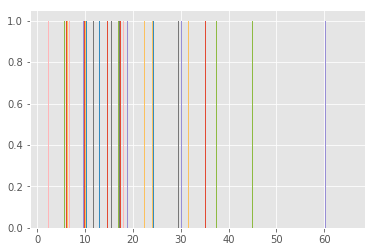

In [46]:
plt.hist(data_hist)

## Properties

In [47]:
df_properties = df[['common_name', 'link', 'properties']]
df_properties = df_properties.dropna(axis = 0)

In [48]:
lst_prop = df_properties.properties.to_list()
#[el for lst in nested_list for el in lst]
len([el for lst in lst_prop for el in lst])
lst_prop = [el for lst in lst_prop for el in lst]

In [49]:
unique_properties_uses = set([el for lst in lst_prop for el in lst])

In [50]:
#unique_properties_uses

In [51]:
count_frequency(lst_prop)

{' Astringent': 112,
 ' Carminative': 43,
 ' Cholagogue': 27,
 ' EFA': 13,
 ' Emollient': 24,
 ' Vulnerary': 43,
 ' Analgesic': 76,
 ' Hepatic': 28,
 ' Laxative': 25,
 ' Styptic': 16,
 ' Vermifuge': 44,
 ' Antirheumatic': 33,
 ' Antispasmodic': 61,
 ' Aromatic': 78,
 ' Calm': 46,
 ' Depurative': 74,
 ' Diuretic': 80,
 ' Muscle Relaxant': 14,
 ' Skin tonic': 31,
 ' Stress': 17,
 ' Vasoconstrictor': 5,
 ' Adaptogens': 19,
 ' Antidepressant': 19,
 ' AntiViral': 38,
 ' Aphrodisiac': 29,
 ' Phytoestrogen': 10,
 ' Stimulant': 43,
 ' Anodyne': 49,
 ' Bitter': 42,
 ' Digestive': 37,
 ' Sedative': 45,
 ' Stomachic': 28,
 ' Antioxidant': 51,
 ' Cordial': 34,
 ' Hypotensive': 28,
 ' Immunostimulant': 27,
 ' Tonic': 27,
 ' Vasodilator': 10,
 ' Cicatrisant': 11,
 ' Diaphoretic': 44,
 ' Emmenagogue': 66,
 ' Expectorant': 39,
 ' Febrifuge': 47,
 ' Hypertensive': 7,
 ' Nervine': 65,
 ' Hypoglycemic': 15,
 ' Antibacterial': 73,
 ' Circulation': 16,
 ' Energize': 10,
 ' Mental Clarity': 17,
 ' Rubefacie

### Text Analysis 

In [116]:
#df_text = df_text.dropna(axis = 0)

In [53]:
#for i in range(len(df_text['medicinal_uses'])):
# print(df_text['medicinal_uses'][0])
# df_text['medicinal_uses'].apply(lambda l: l.strip())

#df_text['medicinal_uses'].apply(lambda l: any(l in [' Arthritis', ' Massage Oils'])

SyntaxError: unexpected EOF while parsing (<ipython-input-53-7459bc99f133>, line 5)

#### Makes everything lowercase

In [221]:
df_text.common_name = df_text.common_name.str.lower() 
df_text.folklore = df_text.folklore.str.lower()         # Do we want everything to be lower in folklore and may not be able to find location?
df_text.description = df_text.description.str.lower()
df_text.tags = df_text.tags.str.lower()

In [85]:
#df_text['medicinal_uses'] = df_text['medicinal_uses'].apply(lambda l: [el.strip() for el in l])

In [90]:
#df_text['medicinal_uses'].apply(lambda l: filter((lambda el: el == "Arthritis"),l))

0      <filter object at 0x11d8f0cc0>
2      <filter object at 0x11d8f0d30>
3      <filter object at 0x11d8f0da0>
4      <filter object at 0x11d8f0e10>
5      <filter object at 0x11d8f0e80>
6      <filter object at 0x11d8f0ef0>
7      <filter object at 0x11d8f0f60>
9      <filter object at 0x11d8f0fd0>
10     <filter object at 0x11e38b048>
12     <filter object at 0x11e38b0b8>
16     <filter object at 0x11e38b128>
17     <filter object at 0x11e38b198>
18     <filter object at 0x11e38b208>
19     <filter object at 0x11e38b278>
21     <filter object at 0x11e38b2e8>
22     <filter object at 0x11e38b358>
23     <filter object at 0x11e38b3c8>
25     <filter object at 0x11e38b438>
27     <filter object at 0x11e38b4a8>
30     <filter object at 0x11e38b518>
32     <filter object at 0x11e38b588>
34     <filter object at 0x11e38b5f8>
35     <filter object at 0x11e38b668>
37     <filter object at 0x11e38b6d8>
38     <filter object at 0x11e38b748>
39     <filter object at 0x11e38b7b8>
40     <filt

In [ ]:
#sum(df_text.medicinal_uses.isna())

#### Find herbs nativeness while searching folklore
 - Find herbs that people smoked
 - see how many herbs where there location can be identified

In [175]:
df_text.sample(10)

,common_name,description,folklore,link,medicinal_uses,origins,properties,tags
229,blessed thistle,"blessed thistle is a bitter tonic, and as suc...",\n\t\n\t\n\t,cnicus benedictus blessed thistle,"Cancer Prevention, Digestion, Female Hormones...",NaN,"Bitter, Cholagogue, Diaphoretic, Diuretic, Em...","cancer prevention, digestion, female hormones..."
245,bee balm,"gorgeous, glowing scarlet heads of bee balm ar...",\n\t\n\t\n\t,monarda didyma bee balm wild bergamot,"Culinary/Kitchen, Herbal Teas",North America,"Analgesic, Antibacterial, Antifungal, Antioxi...","culinary/kitchen, herbal teas,fevers and cold..."
188,centaury,the use of centaury is an ancient one dating b...,\n\t\n\t\n\t,centaurium erythraea centaury,"Digestion, Gout",NaN,"Antirheumatic, Bitter, Cholagogue, Depurative...","digestion, gout,bitter digestive tonic for ga..."
221,boneset,\tthis native american remedy for colds and fe...,\n\t\n\t\n\t,eupatorium perfoliatum boneset,"Bronchitis, Colds, Flu, Immune",North America,"Analgesic, Anodyne, Anti-inflammatory, Antiba...","bronchitis, colds, flu, immune,muscle pain,flu"
345,skullcap,the chemistry of skullcap varies considerably ...,\n\t\n\t\n\tthe herb's first use as a cure and...,scutellaria lateriflora skullcap,"Alcoholism, Anxiety, Chinese, Headache/Migrai...","North America,Traditional Chinese Medicine","Anodyne, Antispasmodic, Astringent, Calm, Emm...","alcoholism, anxiety, chinese, headache/migrai..."
90,horse chestnut,horse chestnut is valued in herbal medicine f...,\n\t\n\t\n\t,aesculus hippocastanum horse chestnut,"Beauty, Bruises/sprains, Cellulite, Diarrhea,...",European,"Analgesic, Astringent, Circulation, Febrifuge...","beauty, bruises/sprains, cellulite, diarrhea,..."
139,ephedra,"\n \n\t\t\n\t,\n\t\n\t, :\r\n mormon-tea , \r...",\n\t\n\t\n\t,herb_detail298,NaN,"\n,\n, \n ,Wikipedia",NaN,diet
196,castor,one of the most time honored home remedies fo...,\n\t\n\t\n\t,ricinus communis castor oil,"African, Arthritis, Bruises/sprains, Constipa...","\n,\n, \n ,African,Middle East,Tropical islands","Analgesic, Anodyne, Antirheumatic, Antiscrofu...","african, arthritis, bruises/sprains, constipa..."
144,elder,leaves of the elder tree are used in an ointme...,\n\t\n\t\n\telder was used in rome and 11th ce...,sambucus nigra elderberry,"Bronchitis, Christmas, Colds, Congestion, Cou...",North America,"AntiViral, Breath, Depurative, emetic, Midsummer","bronchitis, christmas, colds, congestion, cou..."
234,black pepper,"pepper is one of the oldest known spices, and ...","\n\t\n\t\n\tpepper, like cinnamon and cloves i...",piper nigrum black pepper,"Aromatherapy, Ayurvedic, Colds, Culinary/Kitc...",Ayurvedic,"Antioxidant, Antispasmodic, Aphrodisiac, Arom...","aromatherapy, ayurvedic, colds, culinary/kitc..."


In [118]:
df_folklore_text = df_text[df_text.folklore.str.len() > 5]

In [120]:
df_folklore_text[df_folklore_text.str.contains('smok')]

AttributeError: 'DataFrame' object has no attribute 'str'

In [125]:
df_text.to_csv('herb_text_full.csv', sep=',', index = False)